In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm



In [32]:
aku = pd.read_csv('aku.csv', sep=';', index_col=0)

In [33]:
aku.columns

Index(['vyrobce', 'kapacita_5', 'kapacita_100'], dtype='object')

In [34]:
aku.head()

,vyrobce,kapacita_5,kapacita_100
cislo,,,
1,A,1996,1717
2,A,2053,2134
3,A,2087,1981
4,A,2026,1834
5,A,2039,1941


In [35]:
aku['vyrobce']

cislo
1      A
2      A
3      A
4      A
5      A
      ..
124    D
125    D
126    D
127    D
128    D
Name: vyrobce, Length: 128, dtype: object

In [36]:
aku['vyrobce']=aku['vyrobce'].astype('category')

In [37]:
aku['vyrobce']

cislo
1      A
2      A
3      A
4      A
5      A
      ..
124    D
125    D
126    D
127    D
128    D
Name: vyrobce, Length: 128, dtype: category
Categories (4, object): ['A', 'B', 'C', 'D']

In [38]:
aku['vyrobce'].value_counts()

A    32
B    32
C    32
D    32
Name: vyrobce, dtype: int64

<AxesSubplot:ylabel='vyrobce'>

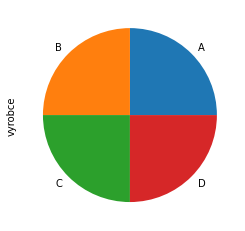

In [31]:
aku['vyrobce'].value_counts().plot.pie()

<AxesSubplot:>

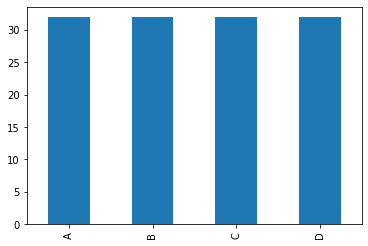

In [39]:
aku['vyrobce'].value_counts().plot.bar()

In [82]:
vyrobce

cislo
1      A
2      A
3      A
4      A
5      A
      ..
124    D
125    D
126    D
127    D
128    D
Name: vyrobce, Length: 128, dtype: category
Categories (4, object): ['A', 'B', 'C', 'D']

<AxesSubplot:ylabel='Frequency'>

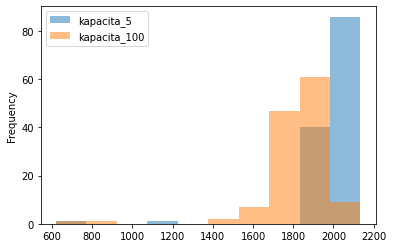

In [40]:
aku.plot.hist(alpha=0.5)

<AxesSubplot:>

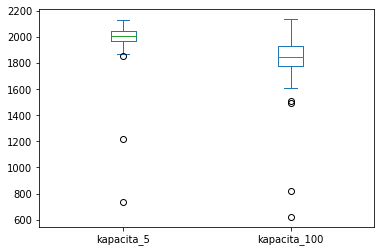

In [42]:
aku.plot.box()

In [52]:
Q1_5=aku['kapacita_5'].quantile(0.25)
Q3_5=aku['kapacita_5'].quantile(0.75)
IQR_5 = Q3_5-Q1_5
out_5 = (aku['kapacita_5']<(Q1_5-1.5*IQR_5)) | (aku['kapacita_5']>(Q3_5+1.5*IQR_5))

In [54]:
aku[out_5]

,vyrobce,kapacita_5,kapacita_100
cislo,,,
20,A,732,620
33,B,1854,1841
88,C,1221,823


In [59]:
aku=aku[np.logical_not(out_5)]

<AxesSubplot:ylabel='Frequency'>

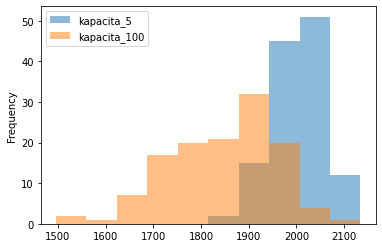

In [66]:
aku.plot.hist(alpha=0.5)

<AxesSubplot:>

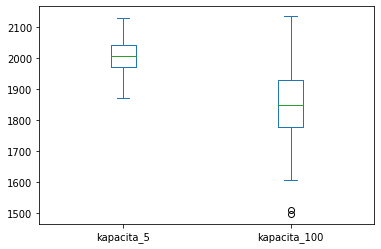

In [61]:
aku.plot.box()

In [62]:
aku.describe()

,kapacita_5,kapacita_100
count,125.000000,125.000000
mean,2005.192000,1846.104000
std,53.207248,112.598403
min,1871.000000,1496.000000
25%,1971.000000,1777.000000
50%,2007.000000,1847.000000
75%,2042.000000,1929.000000
max,2129.000000,2134.000000


<AxesSubplot:xlabel='kapacita_5', ylabel='kapacita_100'>

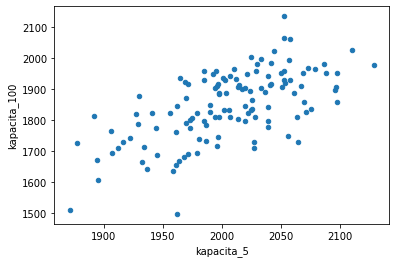

In [65]:
aku.plot.scatter(x='kapacita_5', y='kapacita_100')

In [67]:
aku['pokles']=aku['kapacita_5']-aku['kapacita_100']

<ipython-input-67-7742fd7f4aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aku['pokles']=aku['kapacita_5']-aku['kapacita_100']


In [70]:
aku['rel_pokles']=aku['pokles']/aku['kapacita_5']

<ipython-input-70-f0d5e108d67e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aku['rel_pokles']=aku['pokles']/aku['kapacita_5']


In [71]:
aku['pokles_nad10p'] = aku['rel_pokles']>0.1

<ipython-input-71-b7e34a539f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aku['pokles_nad10p'] = aku['rel_pokles']>0.1


In [74]:
crt = pd.crosstab(aku['vyrobce'], aku['pokles_nad10p'])

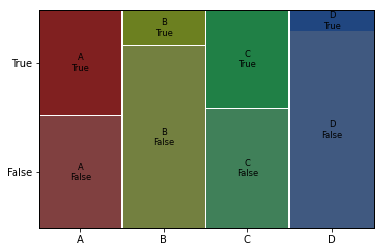

In [87]:
mosaic(aku, ['vyrobce', 'pokles_nad10p']);

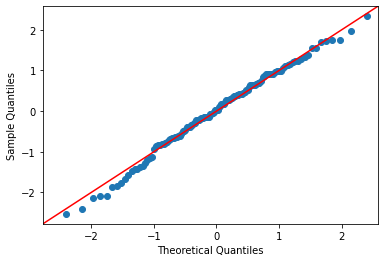

In [100]:
fig=sm.qqplot(aku['kapacita_5'], line='45', fit=True)
plt.show()
